<a href="https://colab.research.google.com/github/MashKeyZ/loan_eligibility/blob/main/loan_eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

In [2]:
import os
os.environ["KAGGLE_USERNAME"] = "#######"
os.environ["KAGGLE_KEY"] = "#############"

In [3]:
import kaggle
kaggle.api.authenticate()

In [4]:
dataset_name = "ninzaami/loan-predication"
download_location = "/content/data"

kaggle.api.dataset_download_files(dataset_name,path=download_location)

In [5]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


Data collection and processing

In [9]:
dataset = pd.read_csv("loan.csv") #read dataset

dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [18]:
dataset.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [20]:
dataset.shape

(614, 13)

Convert USD to ZAR

In [21]:
dataset["ApplicantIncome"] = dataset["ApplicantIncome"] *18.5
dataset["CoapplicantIncome"] = dataset["CoapplicantIncome"] *18.5
dataset["LoanAmount"] = dataset["LoanAmount"]*18.5


In [22]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,108206.5,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,84785.5,27898.0,2368.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,55500.0,0.0,1221.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,47785.5,43623.0,2220.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,111000.0,0.0,2608.5,360.0,1.0,Urban,Y


Handle NaN values

In [24]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
dataset = dataset.dropna() #drop all NaN
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
dataset.shape

(480, 13)

Handle non-numerical values

In [31]:
dataset["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

.

In [28]:
dataset["Property_Area"].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [29]:
dataset["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

Encode

In [30]:
dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
dataset.replace({"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2}},inplace=True)
dataset.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)
dataset.replace({"Self_Employed":{"No":0,"Yes":1}},inplace=True)
dataset.replace({"Married":{"No":0,"Yes":1}},inplace=True)
dataset.replace({"Gender":{"Female":0,"Male":1}},inplace=True)
dataset.replace({"Dependents":{"3+":4}},inplace=True)

In [32]:
dataset["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

In [33]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,84785.5,27898.0,2368.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,55500.0,0.0,1221.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,47785.5,43623.0,2220.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,111000.0,0.0,2608.5,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,100214.5,77626.0,4939.5,360.0,1.0,2,1


Data Visualization

<Axes: xlabel='Education', ylabel='count'>

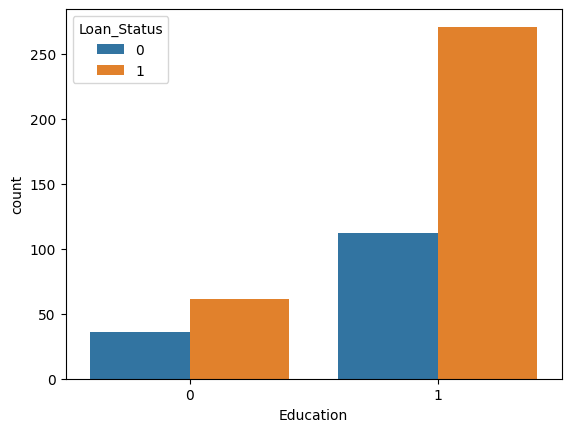

In [40]:
#Educatinon v.s Loan
sns.countplot(x="Education",hue="Loan_Status",data=dataset)

Marital *status*


0=> Not Married
1=> Married

<Axes: xlabel='Married', ylabel='count'>

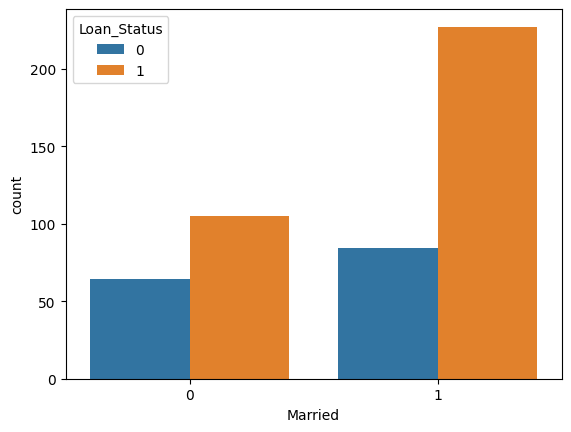

In [41]:
sns.countplot(x="Married",hue="Loan_Status",data=dataset)

Gender

0 => Female
1 => Male

<Axes: xlabel='Gender', ylabel='count'>

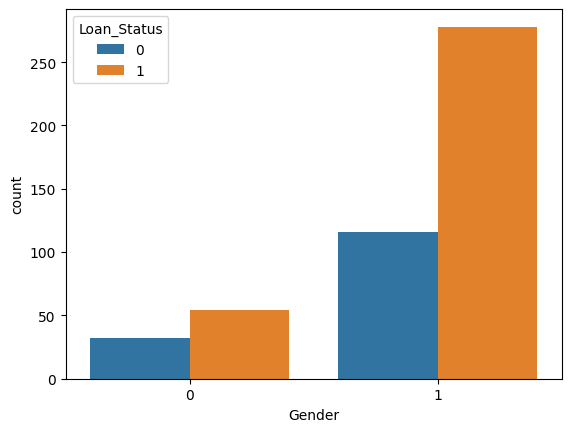

In [42]:

sns.countplot(x="Gender",hue="Loan_Status",data=dataset)

Self Employed

0 => Not self employed

1 => Self employed

<Axes: xlabel='Self_Employed', ylabel='count'>

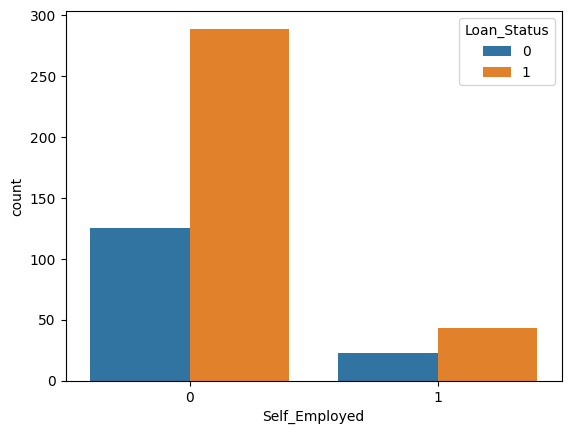

In [43]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=dataset)

**Conclusion**

People with formal qualifications who are married and have a job have a higher chance of getting approved for a loan

Separate features and labels

In [44]:
X = dataset.drop(columns=["Loan_ID","Loan_Status"],axis=1)
y = dataset['Loan_Status']

In [45]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,84785.5,27898.0,2368.0,360.0,1.0,0
2,1,1,0,1,1,55500.0,0.0,1221.0,360.0,1.0,2
3,1,1,0,0,0,47785.5,43623.0,2220.0,360.0,1.0,2
4,1,0,0,1,0,111000.0,0.0,2608.5,360.0,1.0,2
5,1,1,2,1,1,100214.5,77626.0,4939.5,360.0,1.0,2


In [46]:
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

Split data for training and testing

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [48]:
x_train.shape

(432, 11)

In [50]:
x_test.shape

(48, 11)

Train the model

Support Vector Machine

In [57]:
svm_Model = svm.SVC(kernel='linear',C=5.0)

In [58]:
svm_Model.fit(x_train,y_train)
score=svm_Model.score(x_test,y_test)
print("SVM Score : ",score)

SVM Score :  0.6875


Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
# Define and train the model
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
# Predict on test data
y_pred = model.predict(x_test)
reg_score = accuracy_score(y_test, y_pred)
print(f"Accuracy Regression: {reg_score :.4f}")

Accuracy Regression: 0.7083


Decision Trees

In [61]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [62]:
# Predict on test data
y_pred = model.predict(x_test)

# Evaluate performance
tree_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {tree_score:.4f}")

Accuracy: 0.7083


[Text(0.4230769230769231, 0.9, 'Credit_History <= 0.5\ngini = 0.426\nsamples = 432\nvalue = [133, 299]'),
 Text(0.15384615384615385, 0.7, 'ApplicantIncome <= 39543.75\ngini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.5, 'LoanAmount <= 10128.75\ngini = 0.128\nsamples = 58\nvalue = [54, 4]'),
 Text(0.15384615384615385, 0.3, 'Property_Area <= 1.5\ngini = 0.1\nsamples = 57\nvalue = [54, 3]'),
 Text(0.07692307692307693, 0.1, '\n  (...)  \n'),
 Text(0.23076923076923078, 0.1, '\n  (...)  \n'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6923076923076923, 0.7, 'Married <= 0.5\ngini = 0.334\nsamples = 373\nvalue = [79, 294]'),
 Text(0.5384615384615384, 0.5, 'LoanAmount <= 5587.0\ngini = 0.413\nsamples = 134\nvalue = [39, 95]'),
 Text(0.46153846153846156, 0.3, 'Loan_Amount_Term <= 420.0\ngini = 0.393\nsamples = 130\nvalue = [35, 95]'),
 Text(0.384615384615

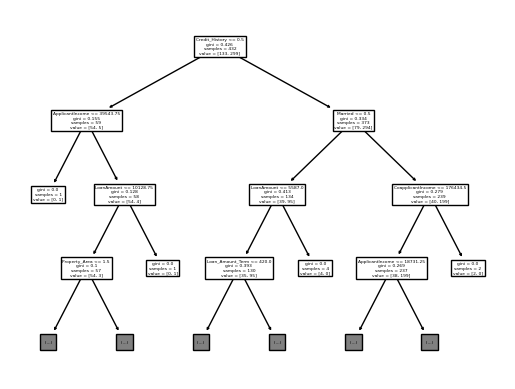

In [65]:
# Visualize the decision tree
from sklearn.tree import plot_tree
plot_tree(tree_model, max_depth=3, feature_names=X.columns)

Random forests

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the model
rand_model = RandomForestClassifier(n_estimators=100, max_depth=5)
rand_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [69]:
# Predict on test data
y_pred = rand_model.predict(x_test)

# Evaluate performance
rand_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rand_score:.4f}")


Accuracy: 0.8333


Plot accuracies

In [70]:
algorithm_names = ["SVM","Logistic Regression", "Decision Tree", "Random Forest"]
accuracies = [score, reg_score, tree_score,rand_score]

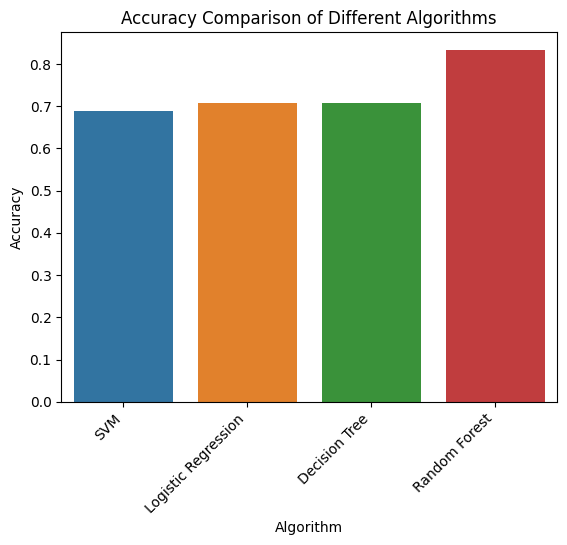

In [72]:
import matplotlib.pyplot as plt

sns.barplot(x=algorithm_names, y=accuracies)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Algorithms")
plt.xticks(rotation=45, ha="right")
plt.show()